In [1]:
from stochastic_volatility_models.src.models.rough_bergomi.rough_bergomi import RoughBergomi
from notebook_utils import Notebook

2024-08-09 04:11:17.179 | INFO     | stochastic_volatility_models.config:initialise:30 - Loaded module `stochastic_volatility_models` from project directory path `/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules`


In [2]:
nb = Notebook(
	to_fit=False,
	model=RoughBergomi(
		parameters={
			"hurst_index": 0.7966150268203153,
			"wiener_correlation": -0.9981022680055287,
			"volatility_of_volatility": 2.3398652742323254,
		},
	),
)
# nb.spx_price()

In [3]:
nb.plot_surfaces()

In [4]:
nb.plot_put_call_iv(plot_closeup=False)
nb.plot_iv(plot_closeup=False)
nb.plot_price(plot_closeup=False)

In [5]:
parameters = nb.fit(
	skew_weight=0,
	vol_weight=0,
)
print(parameters)

{}


```python
{
	'hurst_index': 0.7966150268203153,
	'wiener_correlation': -0.9981022680055287,
	'volatility_of_volatility': 2.3398652742323254,
}
```

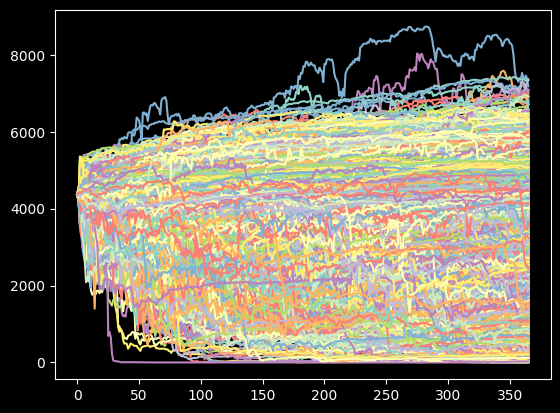

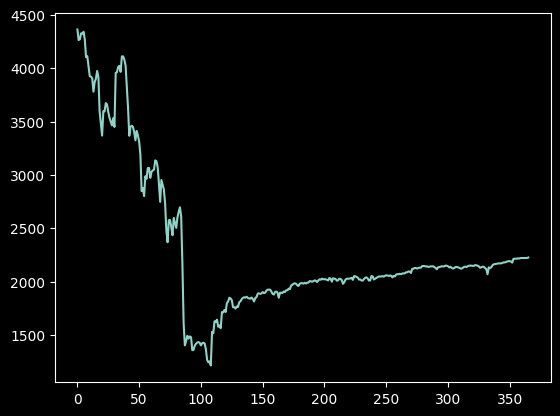

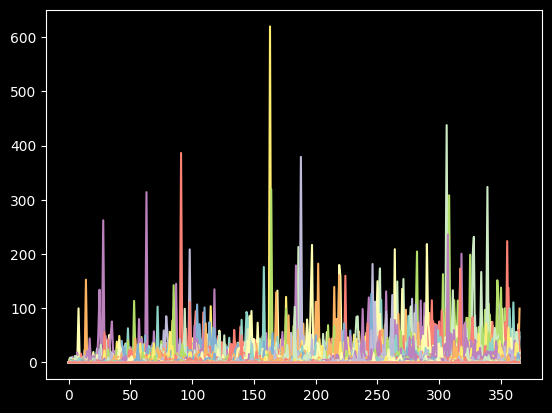

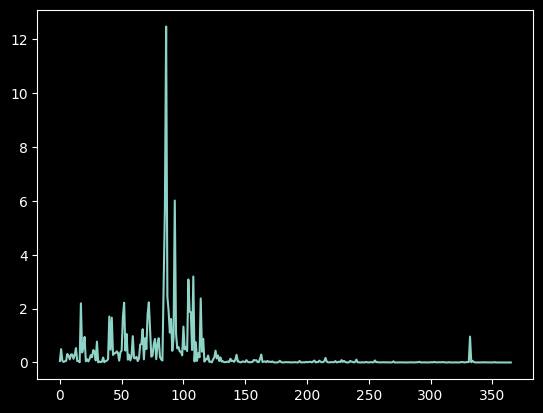

In [6]:
nb.plot_paths()